# Creating FAO Agro Maps per crop

This notebook uses input data from <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">FAO Agro Maps</a>. The scope is to extract all crops available at the desired resolution (admin level 2) merge with spatial admin layer and produce output that can later on be used in the downscaling process.

In [22]:
# Import necessary modules and libraries

# Part 1
import pandas as pd
import os

# Part 2
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import os
from shapely.geometry import Point, Polygon
%matplotlib inline

## Part 1. Creating csv files per crop

In [23]:
# Import data 

path = r"\\ug.kth.se\dfs\home\a\l\alekor\appdata\xp.V2\Desktop\Testing code"
name_of_file = "moz_all_data.csv"

In [24]:
# Import csv as pandas dataframe
df = pd.read_csv(path + "\\" + name_of_file)
df = df.drop(["CONTINENT_CODE", "CONTINENT_NAME"], axis=1)

In [25]:
print ("The number of administrative areas (level 2) is {}, as shown below:".format(df.AREA_NAME.nunique()))
df.AREA_NAME.unique()

The number of administrative areas (level 2) is 134, as shown below:


array(['Cabo Delgado', 'Gaza', 'Inhambane', 'Manica', 'Maputo', 'Nampula',
       'Nassa', 'Sofala', 'Tete', 'Zambezia', 'Ancuabe', 'Balama',
       'Chiure', 'Macomia', 'Mecufi', 'Meluco', 'Mocimboa da Praia',
       'Montepuez', 'Mueda', 'Muidumbe', 'Namuno', 'Nangade', 'Palma',
       'Pemba', 'Quissanga', 'Bilene', 'Chibuto', 'Chicualacuala',
       'Chigubo', 'Chokwe', 'Guija', 'Mabalane', 'Mandlakazi',
       'Massangena', 'Massingir', 'Xai-Xai', 'Funhalouro', 'Govuro',
       'Homoine', 'Inharrime', 'Inhassoro', 'Jangamo', 'Mabote',
       'Massinga', 'Morrumbene', 'Panda', 'Vilanculos', 'Zavala', 'Barue',
       'Gondola', 'Guro', 'Machaze', 'Macossa', 'Mossurize',
       'Sussundenga', 'Tambara', 'Boane', 'Magude', 'Manhica',
       'Marracuene', 'Matutuine', 'Moamba', 'Namaacha', 'Angoche',
       'Erati', 'Lalaua', 'Malema', 'Meconta', 'Mecuburi', 'Memba',
       'Mogovolas', 'Moma', 'Monapo', 'Mongincual', 'Mossuril', 'Muecate',
       'Murrupula', 'Nacala Velha', 'Ribaue',

<div class="alert alert-block alert-warning">
<b>Note_1:</b> According to the <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">data source</a> the most recent year for which admin level 2 data for harvested area are availavle, is the year 2000. 
</div>

In [26]:
print ("The number of crops is {}, as shown below:".format(df.ITEM_NAME.nunique()))
df.ITEM_NAME.unique()

The number of crops is 31, as shown below:


array(['Sweet Potatoes', 'Cassava', 'Yams', 'Sugar Cane', 'Beans, Dry',
       'Peas, Dry', 'Cow Peas, Dry', 'Soybeans', 'Groundnuts in Shell',
       'Sunflower Seed', 'Rice, Paddy', 'Sesame Seed', 'Seed Cotton',
       'Cabbages', 'Tomatoes', 'Pumpkins, Squash, Gourds',
       'Cucumbers and Gherkins', 'Onions, Dry', 'Beans, Green', 'Carrots',
       'Maize', 'Watermelons', 'Tea', 'Pimento, Allspice', 'Ginger',
       'Sisal', 'Millet', 'Tobacco Leaves', 'Sorghum', 'Lettuce',
       'Garlic'], dtype=object)

<div class="alert alert-block alert-warning">
<b>Note_2:</b> According to the <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">data source</a> the crops for which admin level 2 data for harvested area are availavle include Maize, Cassava, Dry Beans and Rice Paddy. Therefore we only focus on these crops.
</div>

### Extracting crop data per admin 2 to unique datarames

#### Maize

In [27]:
df_maize_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Maize") & 
                          (df['YEAR'] == "2000")]
df_maize_2000_admin2.describe()

,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,87.0,87.0,87.000000,0.0,86.000000
mean,2.0,56.0,8839.229885,NaN,7983.848837
std,0.0,0.0,8204.625623,NaN,10510.934520
min,2.0,56.0,626.000000,NaN,0.000000
25%,2.0,56.0,3343.000000,NaN,1582.500000
50%,2.0,56.0,6732.000000,NaN,4314.000000
75%,2.0,56.0,11380.500000,NaN,9692.750000
max,2.0,56.0,45340.000000,NaN,67655.000000


#### Cassava

In [28]:
df_cassava_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Cassava") & 
                          (df['YEAR'] == "2000")]
df_cassava_2000_admin2.describe()

,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,82.000000,82.0,82.000000,0.0,72.000000
mean,1.878049,125.0,15558.865854,NaN,50846.430556
std,0.329243,0.0,32063.497763,NaN,60731.578013
min,1.000000,125.0,201.000000,NaN,4.000000
25%,2.000000,125.0,814.500000,NaN,3315.750000
50%,2.000000,125.0,7130.000000,NaN,21957.000000
75%,2.000000,125.0,18053.750000,NaN,86874.000000
max,2.000000,125.0,240121.000000,NaN,265253.000000


#### Dry Beans

In [29]:
df_dryBeans_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Beans, Dry") & 
                          (df['YEAR'] == "2000")]
df_dryBeans_2000_admin2.describe()

,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,88.0,88.0,88.000000,0.0,0.0
mean,2.0,176.0,2748.829545,NaN,NaN
std,0.0,0.0,2603.593053,NaN,NaN
min,2.0,176.0,56.000000,NaN,NaN
25%,2.0,176.0,1022.250000,NaN,NaN
50%,2.0,176.0,2110.500000,NaN,NaN
75%,2.0,176.0,3926.500000,NaN,NaN
max,2.0,176.0,15030.000000,NaN,NaN


#### Rice paddy

In [30]:
df_rice_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Rice, Paddy") & 
                          (df['YEAR'] == "2000")]
df_rice_2000_admin2.describe()

,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,66.000000,66.0,66.000000,0.0,54.000000
mean,1.848485,27.0,4508.984848,NaN,1579.851852
std,0.361298,0.0,10854.560299,NaN,3683.624499
min,1.000000,27.0,52.000000,NaN,0.000000
25%,2.000000,27.0,401.250000,NaN,48.000000
50%,2.000000,27.0,1139.500000,NaN,292.000000
75%,2.000000,27.0,2725.000000,NaN,1235.000000
max,2.000000,27.0,71539.000000,NaN,24256.000000


### Exporting crop dataframes into separate csv

This part exports the csv files for the crops identified. These csv files can be used in a GIS environment (e.g. Qgis) and be merged with the admin 2 layer. In case you want to proceed and perform this here using geopandas, please proceed to the following steps.

In [31]:
## Define output path
#path = r"\\ug.kth.se\dfs\home\a\l\alekor\appdata\xp.V2\Desktop\Testing code"
#
#df_maize_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_Maize_2000_admin2")))
#df_cassava_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_Cassava_2000_admin2")))
#df_dryBeans_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_DryBeans_2000_admin2")))
#df_rice_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_RicePaddy_2000_admin2")))

## Part 2. Performing spatial join (merge) using geopandas

### Import admin 2 layer

In this case this is a shapefile, but other formats can be accepted here.

In [32]:
path_shp = r"\\ug.kth.se\dfs\home\a\l\alekor\appdata\xp.V2\Desktop\Testing code"
name_shp = "moz_2.shp"
admin_2_gdf = gpd.read_file(path_shp + "\\" + name_shp)

In [33]:
admin_2_gdf.columns

Index(['parent', 'adm0_name', 'code', 'name', 'level', 'geometry'], dtype='object')

### Renaming dfs

First, we need to rename the admin_2 column name in the previous dataframes in order to match with the "merging" column in the imported shapefile.

In [34]:
df_maize_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_cassava_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_dryBeans_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_rice_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)

C:\Users\alekor\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Creating unique gdfs per crop

In [35]:
admin_2_maize_gdf = admin_2_gdf.merge(df_maize_2000_admin2, on="name")
admin_2_cassava_gdf = admin_2_gdf.merge(df_cassava_2000_admin2, on="name")
admin_2_drybeans_gdf = admin_2_gdf.merge(df_dryBeans_2000_admin2, on="name")
admin_2_rice_gdf = admin_2_gdf.merge(df_rice_2000_admin2, on="name")

### Cleaning the gdfs

In [36]:
# Maize
admin_2_maize_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harv_area_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha"}, inplace=True)

admin_2_maize_gdf = admin_2_maize_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE"], axis=1)

# Cassava
admin_2_cassava_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harv_area_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha"}, inplace=True)

admin_2_cassava_gdf = admin_2_cassava_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE"], axis=1)

# Dry Beans
admin_2_drybeans_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harv_area_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha"}, inplace=True)

admin_2_drybeans_gdf = admin_2_drybeans_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE"], axis=1)

# Rice Paddy
admin_2_rice_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harv_area_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha"}, inplace=True)

admin_2_rice_gdf = admin_2_rice_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE"], axis=1)



### Quick visualization of results

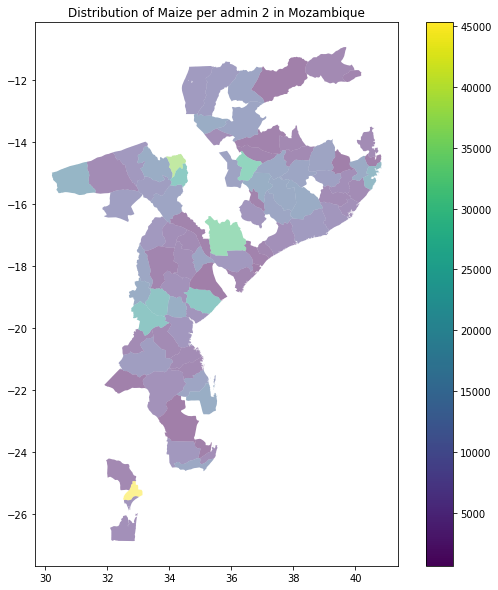

In [37]:
#Maize

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_maize_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Maize"))

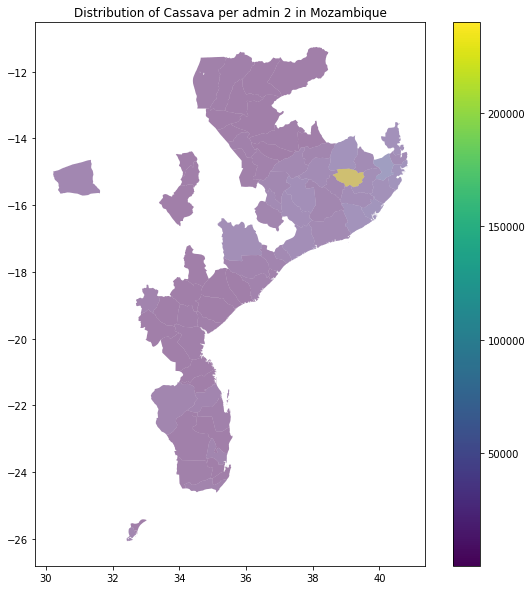

In [38]:
# Cassava

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_cassava_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Cassava"))

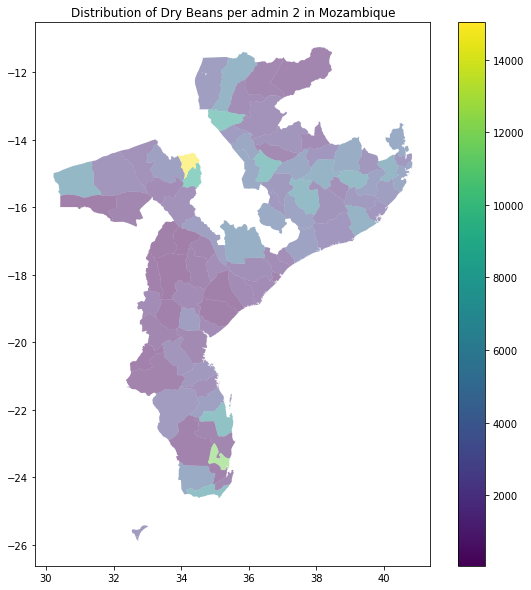

In [39]:
# Dry Beans

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_drybeans_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Dry Beans"))

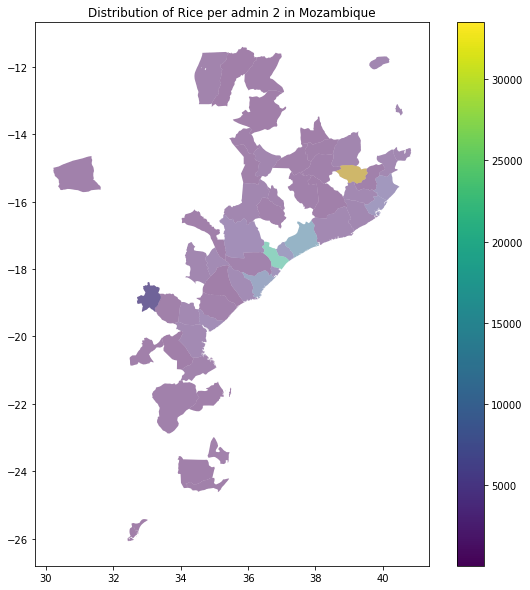

In [40]:
# Rice

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_rice_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Rice"))

### Exporting gdfs to shapefiles (shp)

In [41]:
# Define output path
path = r"\\ug.kth.se\dfs\home\a\l\alekor\appdata\xp.V2\Desktop\Testing code\Maps"

#Maize
admin_2_maize_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_Maize_2000_admin2")))

#Cassava
admin_2_cassava_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_Cassava_2000_admin2")))

#Dry beans
admin_2_drybeans_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_drybeans_2000_admin2")))

#Rice paddy
admin_2_rice_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_rice_2000_admin2")))